## Pair Programming Métricas

- En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

- Calculad las métricas para vuestro modelo
- Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle('../datos/Invistico_Airline_v3.pkl')
df.head(3)

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes,age,flight_distance
0,1,1,2,1,1,0,0,2,2,4,2,3,0,3,5,3,2,0.0,1.041667,-1.400844
1,1,0,2,1,2,0,0,3,0,2,2,4,4,4,2,3,2,305.0,0.291667,0.454852
2,1,1,2,1,1,0,0,3,2,0,2,3,3,4,4,4,2,0.0,-1.041667,0.179747


In [3]:
# separamos los datos para realizar nuestro modelo 

In [4]:
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [5]:
X1.head()

,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes,age,flight_distance
0,1,2,1,1,0,0,2,2,4,2,3,0,3,5,3,2,0.0,1.041667,-1.400844
1,0,2,1,2,0,0,3,0,2,2,4,4,4,2,3,2,305.0,0.291667,0.454852
2,1,2,1,1,0,0,3,2,0,2,3,3,4,4,4,2,0.0,-1.041667,0.179747
3,1,2,1,1,0,0,3,3,4,3,1,0,1,4,1,3,0.0,0.833333,-1.098734
4,1,2,1,1,0,0,3,4,3,4,2,0,2,4,2,5,0.0,1.250000,-1.325738


In [6]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64

In [7]:
df.drop(145, axis=0, inplace=True)

In [8]:
df.reset_index(inplace=True, drop=True)

In [9]:
X1.drop("arrival_delay_in_minutes", axis=1, inplace=True)

In [10]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [11]:
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [13]:
# vamos a hacernos una función para sacar las métricas igual que hicimos con al regresión lineal.


def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [14]:
results_logistic = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.834463,0.848152,0.851829,0.849986,0.665344,test,Regresión logistica
1,0.832826,0.845113,0.849875,0.847487,0.662538,train,Regresión logistica


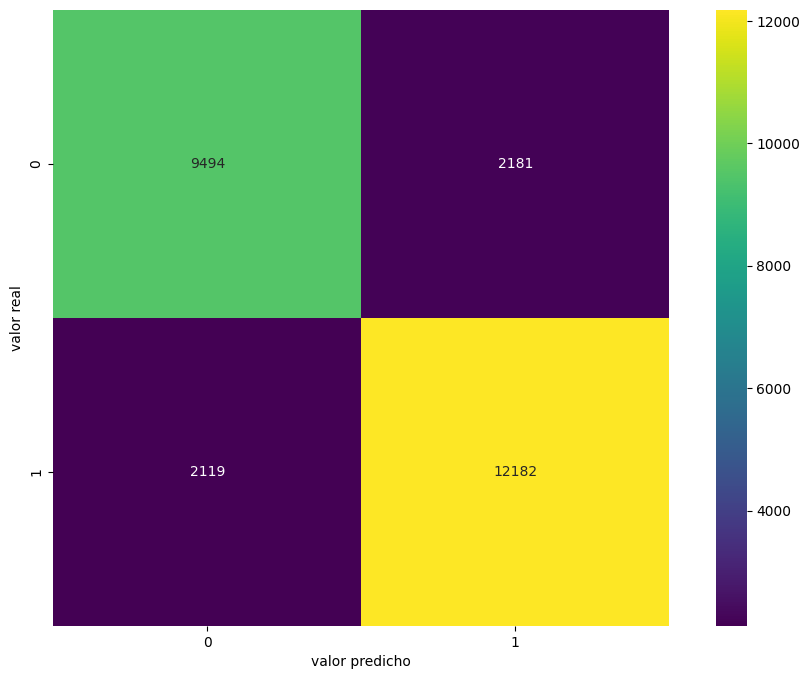

In [17]:
mat_lr_esta = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

# comentamos las métricas
 - Kappa: train:0.66, test:0.66 lo cual nos indica una concordancia buena.
 - accuracy: es de 0.84 lo cual nos indica un buen rendimiento del modelo en aciertos
 - precision: 0.84(test) 0.84(train) nos indica la proporción de verdaderos positivos
 - recall: mide la proporción de verdaderos positivos un alto recall indica que hay falsos negativos train(0.84), test (0.85)
 - f1: es una media combinada de precisión y recall calculada, es decir, refleja la media armónica.

Nuestra variable respuesta se divide en:

0: los pasajeros no estan satisfechos con el servicio
1: los pasajeros estan satisfechos con el servicio
en este contexto:

-  Verdadero negativo: el número 9496 indica que nuestro modelo ha predicho 9496 usuarios que estan no satisfechos con el servicio y en realidad no están contentos.

- Verdadero positivo: el numero 12182, indica que nuestro modelo ha predicho 12182 pasajeros que están satisfechos con el servicio y que en realidad sí están satisfechos.

- Falso negativo: el número 2119(abajo a la izquierda) indica que nuestro modelo esá prediciendo que 2119 usuarios no están satisfechos cuando en realiadad sí están satisfechos.

- Falso positivo: el número 2179 indica que nuestro modelo está prediciendo que 2179 estan satisfechos cuando en realidad no lo están.

---> En nuestro caso nos interesan los FP (falsos positivos), así que priorizaremos el recall

In [15]:
results_logistic.to_pickle("../datos/resultado_RL.pkl")


In [16]:
df.to_pickle('../datos/df_cod.pkl')